In [2]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import re
import numpy as np
import time

In [44]:
CLIENT_ID = 'X3JFQNUFYXMWQJPHIXVTKSUZ0DSGK11AW04AMNS2QZDOYXUE'

CLIENT_SECRET = 'Q3NC0NBXHUWD3ZMQCCBM5FN5U0UGOBV12W5ZFCJJ5GZ2XDSJ'

LIMIT = 50

v='20210205'

# Foursquare API to get venues

In [59]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},-{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            v,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

        time.sleep(1)
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['community_area', 
                  'area_latitude', 
                  'area_longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [37]:
# load dataframe
chicago_final = pd.read_csv('chicago_final1.csv')

chicago_final['latitude'] = chicago_final['latitude'].apply(lambda x: x.replace('°N', ''))
chicago_final['longitude'] = chicago_final['longitude'].apply(lambda x: x.replace('°W', ''))

In [60]:
chicago_venues = getNearbyVenues(names=chicago_final['community_area'],
                                   latitudes=chicago_final['latitude'],
                                   longitudes=chicago_final['longitude']
                                  )

Rogers Park
West Ridge
Uptown
Lincoln Square
North Center
Lakeview
Lincoln Park
Near North Side
Edison Park
Norwood Park
Jefferson Park
Forest Glen
North Park
Albany Park
Portage Park
Irving Park
Dunning
Montclare
Belmont Cragin
Hermosa
Avondale
Logan Square
Humboldt Park
West Town
Austin
West Garfield Park
East Garfield Park
Near West Side
North Lawndale
South Lawndale Little Village
Lower West Side Pilsen
The Loop
Near South Side
Armour Square
Douglas
Oakland
Fuller Park
Grand Boulevard
Kenwood
Washington Park
Hyde Park
Woodlawn
South Shore
Chatham
Avalon Park
South Chicago
Burnside
Calumet Heights
Roseland
Pullman
South Deering
East Side
West Pullman
Riverdale
Hegewisch
Garfield Ridge
Archer Heights
Brighton Park
McKinley Park
Bridgeport
New City Back of the Yards/Canaryville
West Elsdon
Gage Park
Clearing
West Lawn
Chicago Lawn
West Englewood
Englewood
Greater Grand Crossing
Ashburn
Auburn Gresham
Beverly
Washington Heights
Mount Greenwood
Morgan Park
O'Hare
Edgewater


In [266]:
chicago_venues

,community_area,area_latitude,area_longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Rogers Park,42.01,87.67,Morse Fresh Market,42.008087,-87.667041,Grocery Store
1,Rogers Park,42.01,87.67,The Common Cup,42.007797,-87.667901,Coffee Shop
2,Rogers Park,42.01,87.67,El Famous Burrito,42.010421,-87.674204,Mexican Restaurant
3,Rogers Park,42.01,87.67,Smack Dab,42.009291,-87.666201,Bakery
4,Rogers Park,42.01,87.67,Glenwood Sunday Market,42.008525,-87.666251,Farmers Market
...,...,...,...,...,...,...,...
1343,Edgewater,41.99,87.66,Family Dollar,41.986363,-87.659577,Discount Store
1344,Edgewater,41.99,87.66,Park No. 517,41.991756,-87.655610,Park
1345,Edgewater,41.99,87.66,thorndale beach,41.989209,-87.655004,Beach
1346,Edgewater,41.99,87.66,Malibu East Convenience Store @ Csptain's Walk,41.991492,-87.655259,Convenience Store


In [74]:
# chicago_venues.to_csv('chicago_foursquare_venues.csv', index=False)

In [38]:
chicago_venues = pd.read_csv('chicago_foursquare_venues.csv')

In [39]:
chicago_venues.groupby('community_area').count()

,area_latitude,area_longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
community_area,,,,,,
Albany Park,14,14,14,14,14,14
Archer Heights,7,7,7,7,7,7
Armour Square,20,20,20,20,20,20
Ashburn,8,8,8,8,8,8
Auburn Gresham,12,12,12,12,12,12
...,...,...,...,...,...,...
West Lawn,16,16,16,16,16,16
West Pullman,3,3,3,3,3,3
West Ridge,43,43,43,43,43,43


In [40]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue_Category'].unique())))

There are 219 uniques categories.


In [41]:
chicago_venues['Venue_Category'].unique()


array(['Grocery Store', 'Coffee Shop', 'Mexican Restaurant', 'Bakery',
       'Farmers Market', 'Bar', 'Theater', 'Gift Shop', 'Concert Hall',
       'Pizza Place', 'Pet Store', 'Diner', 'Asian Restaurant',
       'Deli / Bodega', 'American Restaurant', 'Sushi Restaurant',
       'Greek Restaurant', 'Sandwich Place', 'Chinese Restaurant',
       'Dive Bar', 'Donut Shop', 'Breakfast Spot', 'Train Station',
       'History Museum', 'Convenience Store', 'Spa', 'Scenic Lookout',
       'Fruit & Vegetable Store', 'Park', 'Indian Restaurant',
       'Pakistani Restaurant', 'Afghan Restaurant', 'Burmese Restaurant',
       'Dessert Shop', 'Fried Chicken Joint', 'Juice Bar',
       'Electronics Store', 'Football Stadium', 'Fast Food Restaurant',
       'Market', 'Mediterranean Restaurant', 'Boutique', 'Jazz Club',
       'Climbing Gym', 'Ethiopian Restaurant', 'Arcade', 'Music Venue',
       'Vietnamese Restaurant', 'Bubble Tea Shop', 'Thai Restaurant',
       'Plaza', 'Lounge', 'Bank', 'Mobil

In [42]:
# create list of most important health related categories

health_venues = []

for i in chicago_venues['Venue_Category'].unique():
    if re.search('Fitness', str(i), flags=re.I) \
        or re.search('Gym', str(i), flags=re.I) \
        or re.search('Studio', str(i), flags=re.I) \
        or re.search('Vegetable', str(i), flags=re.I) \
        or re.search('Supplement', str(i), flags=re.I) \
        or re.search('Health', str(i), flags=re.I) \
        or re.search('Organic', str(i), flags=re.I) \
        or re.search('Farmers', str(i), flags=re.I) \
        or re.search('Sporting', str(i), flags=re.I) \
        or re.search('Park', str(i), flags=re.I) \
        or re.search('Court', str(i), flags=re.I) \
        or re.search('Field', str(i), flags=re.I) \
        or re.search('Spa ', str(i), flags=re.I):
        
        health_venues.append(i)
        
health_venues

['Farmers Market',
 'Fruit & Vegetable Store',
 'Park',
 'Climbing Gym',
 'Sporting Goods Shop',
 'Gym',
 'Yoga Studio',
 'Gym / Fitness Center',
 'Dance Studio',
 'Massage Studio',
 'Supplement Shop',
 'Field',
 'Soccer Field',
 'Health & Beauty Service',
 'Organic Grocery',
 'College Gym',
 'Basketball Court',
 'Tennis Court',
 'Health Food Store',
 'Baseball Field']

In [43]:
chicago_venues[chicago_venues['Venue_Category'].isin(health_venues)]

,community_area,area_latitude,area_longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
4,Rogers Park,42.01000,87.67000,Glenwood Sunday Market,42.008525,-87.666251,Farmers Market
40,West Ridge,42.00000,87.69000,World Fresh Market,41.997799,-87.691421,Fruit & Vegetable Store
41,West Ridge,42.00000,87.69000,Warren Park,42.002414,-87.687969,Park
84,Uptown,41.97000,87.66000,First Ascent Uptown,41.967889,-87.659191,Climbing Gym
133,Lincoln Square,41.97000,87.69000,Fleet Feet,41.968202,-87.688374,Sporting Goods Shop
...,...,...,...,...,...,...,...
1269,Auburn Gresham,41.74000,87.66000,Foster Park Field House,41.741658,-87.659955,Park
1275,Auburn Gresham,41.74000,87.66000,Tha H00D,41.743247,-87.660292,Basketball Court
1301,Washington Heights,41.70383,87.65367,Robinson (Jackie) Park,41.702288,-87.648282,Basketball Court
1323,Edgewater,41.99000,87.66000,LA Fitness,41.992489,-87.659991,Gym


In [44]:
# list community areas with largest number of these categories of businesses
health_count_df = chicago_venues[chicago_venues['Venue_Category']
                           .isin(health_venues)] \
                            .groupby('community_area') \
                            .count().sort_values(by='Venue_Category', ascending=False)
health_count_df

,area_latitude,area_longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
community_area,,,,,,
Hyde Park,7,7,7,7,7,7
Near North Side,7,7,7,7,7,7
Near South Side,6,6,6,6,6,6
Lincoln Square,6,6,6,6,6,6
Lincoln Park,6,6,6,6,6,6
Logan Square,5,5,5,5,5,5
Oakland,4,4,4,4,4,4
Avondale,4,4,4,4,4,4
The Loop,3,3,3,3,3,3


In [45]:
health_count_df.reset_index().rename(columns={'area_latitude': 'num_health_related'}).iloc[:, :2][:10]
# .rename(columns={'Venue_Category': 'num_of_health_related'})

,community_area,num_health_related
0,Hyde Park,7
1,Near North Side,7
2,Near South Side,6
3,Lincoln Square,6
4,Lincoln Park,6
5,Logan Square,5
6,Oakland,4
7,Avondale,4
8,The Loop,3
9,Near West Side,3


In [46]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['community_area'] = chicago_venues['community_area'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

,community_area,ATM,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
chicago_onehot.shape

(1348, 220)

In [48]:
chicago_grouped = chicago_onehot.groupby('community_area').mean().reset_index()
chicago_grouped

,community_area,ATM,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albany Park,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
1,Archer Heights,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
2,Armour Square,0.0,0.000000,0.0,0.0,0.0,0.050000,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.05,0.00,0.0,0.0,0.00,0.00
3,Ashburn,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
4,Auburn Gresham,0.0,0.000000,0.0,0.0,0.0,0.083333,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,West Lawn,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
72,West Pullman,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
73,West Ridge,0.0,0.023256,0.0,0.0,0.0,0.023256,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
74,West Town,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.02,...,0.0,0.0,0.0,0.0,0.00,0.02,0.0,0.0,0.02,0.02


In [49]:
num_top_venues = 5

for hood in chicago_grouped['community_area']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['community_area'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park----
                venue  freq
0       Grocery Store  0.21
1  Mexican Restaurant  0.21
2                Park  0.14
3   Korean Restaurant  0.07
4              Bakery  0.07


----Archer Heights----
                venue  freq
0  Mexican Restaurant  0.29
1                Food  0.29
2              Bakery  0.14
3  Seafood Restaurant  0.14
4                 Bar  0.14


----Armour Square----
              venue  freq
0  Baseball Stadium  0.25
1               Bar  0.15
2            Lounge  0.15
3        Sports Bar  0.10
4              Park  0.05


----Ashburn----
                 venue  freq
0       Cosmetics Shop  0.12
1            Nightclub  0.12
2          Bus Station  0.12
3          Snack Place  0.12
4  Martial Arts School  0.12


----Auburn Gresham----
                  venue  freq
0  Fast Food Restaurant  0.17
1     Currency Exchange  0.08
2              Pharmacy  0.08
3              Boutique  0.08
4           Gas Station  0.08


----Austin----
               venue  fre

               venue  freq
0           Boutique  0.07
1                Pub  0.07
2  Mobile Phone Shop  0.07
3        Yoga Studio  0.04
4        Music Venue  0.04


----North Lawndale----
                  venue  freq
0          Liquor Store  0.33
1     Currency Exchange  0.33
2  Fast Food Restaurant  0.33
3                   ATM  0.00
4         Moving Target  0.00


----North Park----
               venue  freq
0           Boutique  0.07
1                Pub  0.07
2  Mobile Phone Shop  0.07
3        Yoga Studio  0.04
4        Music Venue  0.04


----Norwood Park----
                venue  freq
0         Pizza Place  0.38
1          Sports Bar  0.12
2            Pharmacy  0.12
3       Jewelry Store  0.12
4  Chinese Restaurant  0.12


----O'Hare----
                           venue  freq
0                Airport Service   1.0
1                            ATM   0.0
2  Paper / Office Supplies Store   0.0
3            Moroccan Restaurant   0.0
4                  Movie Theater   0.0


----Oa

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['community_area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
chicago_venues_sorted = pd.DataFrame(columns=columns)
chicago_venues_sorted['community_area'] = chicago_grouped['community_area']

for ind in np.arange(chicago_grouped.shape[0]):
    chicago_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

chicago_venues_sorted.head()

,community_area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Grocery Store,Mexican Restaurant,Park,Taco Place,Bakery,Karaoke Bar,Chinese Restaurant,Korean Restaurant,Fast Food Restaurant,Ethiopian Restaurant
1,Archer Heights,Food,Mexican Restaurant,Bar,Bakery,Seafood Restaurant,Yoga Studio,Eye Doctor,Flower Shop,Floating Market,Fish Market
2,Armour Square,Baseball Stadium,Bar,Lounge,Sports Bar,Clothing Store,Park,Train Station,Bakery,American Restaurant,Whisky Bar
3,Ashburn,Cosmetics Shop,Automotive Shop,Martial Arts School,Snack Place,Light Rail Station,Bar,Bus Station,Nightclub,Diner,Discount Store
4,Auburn Gresham,Fast Food Restaurant,Grocery Store,Nightclub,Locksmith,Basketball Court,Park,Gas Station,American Restaurant,Pharmacy,Currency Exchange


In [75]:
# chicago_venues_sorted.to_csv('chicago_common_venues.csv', index=False)

In [52]:
df = pd.read_csv('chicago_common_venues.csv')
df

,community_area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Grocery Store,Mexican Restaurant,Park,Taco Place,Bakery,Karaoke Bar,Chinese Restaurant,Korean Restaurant,Fast Food Restaurant,Ethiopian Restaurant
1,Archer Heights,Food,Mexican Restaurant,Bar,Bakery,Seafood Restaurant,Yoga Studio,Eye Doctor,Flower Shop,Floating Market,Fish Market
2,Armour Square,Baseball Stadium,Bar,Lounge,Sports Bar,Clothing Store,Park,Train Station,Bakery,American Restaurant,Whisky Bar
3,Ashburn,Cosmetics Shop,Automotive Shop,Martial Arts School,Snack Place,Light Rail Station,Bar,Bus Station,Nightclub,Diner,Discount Store
4,Auburn Gresham,Fast Food Restaurant,Grocery Store,Nightclub,Locksmith,Basketball Court,Park,Gas Station,American Restaurant,Pharmacy,Currency Exchange
...,...,...,...,...,...,...,...,...,...,...,...
71,West Lawn,Mexican Restaurant,Fast Food Restaurant,Ice Cream Shop,Diner,Shopping Mall,Seafood Restaurant,Bowling Alley,Automotive Shop,Discount Store,Donut Shop
72,West Pullman,Convenience Store,Bar,Yoga Studio,Ethiopian Restaurant,Food,Flower Shop,Floating Market,Fish Market,Fish & Chips Shop,Field
73,West Ridge,Indian Restaurant,Pakistani Restaurant,Market,Chinese Restaurant,Boutique,Electronics Store,Burmese Restaurant,Mediterranean Restaurant,Football Stadium,Fried Chicken Joint
74,West Town,Bar,Italian Restaurant,Boutique,Pub,Bakery,Mediterranean Restaurant,Mexican Restaurant,Café,Restaurant,Chinese Restaurant


In [53]:
df2 = pd.read_csv('chicago_final1.csv').sort_values(by='community_area')
df2

,community_area,zip_codes,population,latitude,longitude,community_area.1,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,...,Prostate Cancer in Males,Stroke (Cerebrovascular Disease),Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
13,Albany Park,"60625, 60630",50343,41.9700°N,87.7200°W,Albany Park,18.3,76.5,8.5,73.3,...,13.1,39.1,101.8,16.8,17.1,11.2,32.1,34.9,20355,9.0
56,Archer Heights,60632,13055,41.8100°N,87.7300°W,Archer Heights,18.1,80.0,8.7,74.3,...,20.5,41.8,.,1.5,13.0,8.5,40.5,36.4,16145,14.2
33,Armour Square,"60609, 60616",13779,41.8333°N,87.6333°W,Armour Square,11.5,57.1,12.4,79.1,...,17.2,38.7,218,22.7,35.8,5.9,37.9,37.5,16942,11.6
69,Ashburn,60652,42752,41.7500°N,87.7100°W,Ashburn,14.7,69.0,9.0,82.4,...,44.5,47.4,602.9,4.4,9.5,4.2,36.7,18.3,22078,8.8
70,Auburn Gresham,60620,45842,41.7400°N,87.6600°W,Auburn Gresham,15.1,70.5,11.6,71.8,...,43.5,63.7,1986.7,7.3,24.5,4.1,42.1,19.5,16022,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,West Lawn,60629,"32,749",41.7700°N,87.7200°W,West Lawn,18.8,83.3,7.6,83.5,...,19.7,43.1,87.2,4.3,15.3,6.8,41.9,33.4,15898,7.8
52,West Pullman,"60628, 60643","27,982",41.6800°N,87.6300°W,West Pullman,15.3,71.2,14.9,71.3,...,62.9,63.9,1673.4,9.2,24.3,3.3,42.2,22.6,16228,17.0
1,West Ridge,"60645, 60659",77212,42.000°N,87.6900°W,West Ridge,17.3,83.3,8.1,71.1,...,14.2,34.7,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
23,West Town,"60612, 60622, 60642, 60647",84255,41.900°N,87.6800°W,West Town,18.8,60.4,9.1,75.5,...,16.6,33.3,182.8,3.6,15.7,2.0,22.9,13.4,39596,6.0


In [54]:
df2.columns

Index(['community_area', 'zip_codes', 'population', 'latitude', 'longitude',
       'community_area.1', 'Birth Rate', 'General Fertility Rate',
       'Low Birth Weight', 'Prenatal Care Beginning in First Trimester',
       'Preterm Births', 'Teen Birth Rate', 'Assault (Homicide)',
       'Breast cancer in females', 'Cancer (All Sites)', 'Colorectal Cancer',
       'Diabetes-related', 'Firearm-related', 'Infant Mortality Rate',
       'Lung Cancer', 'Prostate Cancer in Males',
       'Stroke (Cerebrovascular Disease)', 'Gonorrhea in Males',
       'Tuberculosis', 'Below Poverty Level', 'Crowded Housing', 'Dependency',
       'No High School Diploma', 'Per Capita Income', 'Unemployment'],
      dtype='object')

In [55]:
most_important_cols = ['community_area', 'latitude', 'longitude', 'population', 
       'Birth Rate', 
       'Breast cancer in females', 'Cancer (All Sites)', 'Colorectal Cancer',
       'Diabetes-related', 
       'Lung Cancer', 'Prostate Cancer in Males',
       'Stroke (Cerebrovascular Disease)', 
       'Below Poverty Level', 'Crowded Housing', 'Dependency',
       'No High School Diploma', 'Per Capita Income', 'Unemployment']

In [56]:
df2 = df2[most_important_cols]

In [57]:
df2['population'] = df2['population'].apply(lambda x: x.replace(',', ''))

<ipython-input-57-929ba679e642>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['population'] = df2['population'].apply(lambda x: x.replace(',', ''))


In [58]:
df2

,community_area,latitude,longitude,population,Birth Rate,Breast cancer in females,Cancer (All Sites),Colorectal Cancer,Diabetes-related,Lung Cancer,Prostate Cancer in Males,Stroke (Cerebrovascular Disease),Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
13,Albany Park,41.9700°N,87.7200°W,50343,18.3,22.9,158.1,16.8,72.1,36.9,13.1,39.1,17.1,11.2,32.1,34.9,20355,9.0
56,Archer Heights,41.8100°N,87.7300°W,13055,18.1,25.2,166.3,9.0,67.7,49.6,20.5,41.8,13.0,8.5,40.5,36.4,16145,14.2
33,Armour Square,41.8333°N,87.6333°W,13779,11.5,10.7,162.9,23.1,42.5,54.3,17.2,38.7,35.8,5.9,37.9,37.5,16942,11.6
69,Ashburn,41.7500°N,87.7100°W,42752,14.7,37.2,229.3,22.8,80.1,62.8,44.5,47.4,9.5,4.2,36.7,18.3,22078,8.8
70,Auburn Gresham,41.7400°N,87.6600°W,45842,15.1,41.9,243.0,24.5,83.6,65.1,43.5,63.7,24.5,4.1,42.1,19.5,16022,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,West Lawn,41.7700°N,87.7200°W,32749,18.8,16.9,145.1,15.7,61.5,36.7,19.7,43.1,15.3,6.8,41.9,33.4,15898,7.8
52,West Pullman,41.6800°N,87.6300°W,27982,15.3,20.3,263.6,32.6,83.4,78.6,62.9,63.9,24.3,3.3,42.2,22.6,16228,17.0
1,West Ridge,42.000°N,87.6900°W,77212,17.3,20.2,155.9,17.3,60.5,36.0,14.2,34.7,15.1,7.0,38.3,19.6,21375,7.9
23,West Town,41.900°N,87.6800°W,84255,18.8,14.5,139.6,12.4,107.0,27.4,16.6,33.3,15.7,2.0,22.9,13.4,39596,6.0


In [59]:
df2.describe()

,Birth Rate,Breast cancer in females,Cancer (All Sites),Colorectal Cancer,Diabetes-related,Lung Cancer,Prostate Cancer in Males,Stroke (Cerebrovascular Disease),Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,15.698701,25.951948,194.277922,21.584416,71.937662,51.481818,36.805195,46.544156,20.292208,4.912987,35.829870,21.596104,25106.740260,13.303896
std,3.528735,9.557590,45.652058,7.695335,21.497999,16.439928,20.595189,14.448570,11.496988,3.657341,7.269802,12.354995,14952.672297,7.031965
min,9.400000,7.600000,120.100000,8.600000,26.800000,15.900000,0.000000,22.000000,3.100000,0.200000,15.500000,2.900000,8535.000000,4.200000
25%,12.900000,20.200000,152.900000,15.100000,58.600000,37.700000,19.700000,37.900000,12.000000,2.000000,32.300000,13.400000,15467.000000,7.800000
50%,15.700000,24.000000,189.400000,21.900000,73.000000,50.000000,32.100000,43.100000,18.200000,4.200000,38.300000,18.500000,20489.000000,11.500000
75%,18.500000,32.700000,235.200000,27.100000,83.900000,63.800000,51.400000,53.500000,26.100000,6.800000,40.900000,29.400000,29026.000000,17.400000
max,22.400000,54.700000,291.500000,39.400000,119.100000,89.600000,92.900000,99.100000,61.400000,17.600000,50.200000,58.700000,87163.000000,40.000000


In [60]:
chi_df = pd.merge(df2, chicago_grouped, on='community_area')
chi_df

,community_area,latitude,longitude,population,Birth Rate,Breast cancer in females,Cancer (All Sites),Colorectal Cancer,Diabetes-related,Lung Cancer,...,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albany Park,41.9700°N,87.7200°W,50343,18.3,22.9,158.1,16.8,72.1,36.9,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
1,Archer Heights,41.8100°N,87.7300°W,13055,18.1,25.2,166.3,9.0,67.7,49.6,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
2,Armour Square,41.8333°N,87.6333°W,13779,11.5,10.7,162.9,23.1,42.5,54.3,...,0.0,0.0,0.0,0.0,0.05,0.00,0.0,0.0,0.00,0.00
3,Ashburn,41.7500°N,87.7100°W,42752,14.7,37.2,229.3,22.8,80.1,62.8,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
4,Auburn Gresham,41.7400°N,87.6600°W,45842,15.1,41.9,243.0,24.5,83.6,65.1,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,West Lawn,41.7700°N,87.7200°W,32749,18.8,16.9,145.1,15.7,61.5,36.7,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
72,West Pullman,41.6800°N,87.6300°W,27982,15.3,20.3,263.6,32.6,83.4,78.6,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
73,West Ridge,42.000°N,87.6900°W,77212,17.3,20.2,155.9,17.3,60.5,36.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
74,West Town,41.900°N,87.6800°W,84255,18.8,14.5,139.6,12.4,107.0,27.4,...,0.0,0.0,0.0,0.0,0.00,0.02,0.0,0.0,0.02,0.02


In [61]:
X = chi_df.iloc[:, 3:]
X

,population,Birth Rate,Breast cancer in females,Cancer (All Sites),Colorectal Cancer,Diabetes-related,Lung Cancer,Prostate Cancer in Males,Stroke (Cerebrovascular Disease),Below Poverty Level,...,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,50343,18.3,22.9,158.1,16.8,72.1,36.9,13.1,39.1,17.1,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
1,13055,18.1,25.2,166.3,9.0,67.7,49.6,20.5,41.8,13.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
2,13779,11.5,10.7,162.9,23.1,42.5,54.3,17.2,38.7,35.8,...,0.0,0.0,0.0,0.0,0.05,0.00,0.0,0.0,0.00,0.00
3,42752,14.7,37.2,229.3,22.8,80.1,62.8,44.5,47.4,9.5,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
4,45842,15.1,41.9,243.0,24.5,83.6,65.1,43.5,63.7,24.5,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,32749,18.8,16.9,145.1,15.7,61.5,36.7,19.7,43.1,15.3,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
72,27982,15.3,20.3,263.6,32.6,83.4,78.6,62.9,63.9,24.3,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
73,77212,17.3,20.2,155.9,17.3,60.5,36.0,14.2,34.7,15.1,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
74,84255,18.8,14.5,139.6,12.4,107.0,27.4,16.6,33.3,15.7,...,0.0,0.0,0.0,0.0,0.00,0.02,0.0,0.0,0.02,0.02


# KMeans Clustering

In [62]:
from sklearn.cluster import KMeans 

from sklearn import metrics 

from scipy.spatial.distance import cdist 

import numpy as np 

import matplotlib.pyplot as plt  
 

In [63]:
distortions = [] 

inertias = [] 

mapping1 = {} 

mapping2 = {} 

K = range(1,20) 

  

for k in K: 

    #Building and fitting the model 

    kmeanModel = KMeans(n_clusters=k).fit(X) 

    kmeanModel.fit(X)     

      

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 

                      'euclidean'),axis=1)) / X.shape[0]) 

    inertias.append(kmeanModel.inertia_) 

  

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 

                 'euclidean'),axis=1)) / X.shape[0] 

    mapping2[k] = kmeanModel.inertia_ 

In [64]:
for key,val in mapping1.items(): 

    print(str(key)+' : '+str(val)) 

1 : 23062.464848192558
2 : 16322.542620948609
3 : 13734.942011634077
4 : 12464.627920944029
5 : 10429.137120910425
6 : 9274.78578506329
7 : 8442.426721803795
8 : 7620.0084990409405
9 : 7286.578952851696
10 : 6823.289410348779
11 : 6482.401681759345
12 : 6148.573368923562
13 : 5853.839663862164
14 : 5480.815164943204
15 : 5128.852262837306
16 : 4808.047523134193
17 : 4573.739526875256
18 : 4175.354666693643
19 : 4172.269034434344


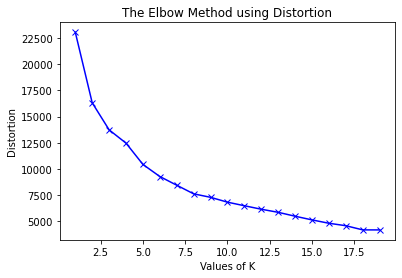

In [65]:
plt.plot(K, distortions, 'bx-') 

plt.xlabel('Values of K') 

plt.ylabel('Distortion') 

plt.title('The Elbow Method using Distortion') 
plt.show() 

In [66]:
for key,val in mapping2.items(): 

    print(str(key)+' : '+str(val)) 

1 : 57497510307.50041
2 : 28101508303.944218
3 : 20606729923.796062
4 : 14876282867.590559
5 : 10454959006.576674
6 : 8253386644.430478
7 : 6840973395.974379
8 : 5672433549.567817
9 : 5027553455.496485
10 : 4454546758.684079
11 : 3864864344.536829
12 : 3535087123.181724
13 : 3275092861.9116187
14 : 2808932871.3338847
15 : 2614100654.6310053
16 : 2208794096.3862114
17 : 2031701968.4050934
18 : 1708024482.6810095
19 : 1649150272.7280047


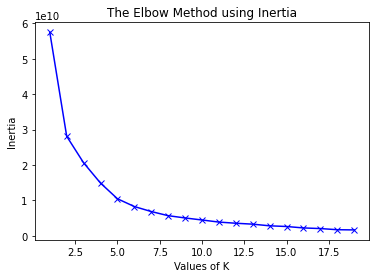

In [67]:
plt.plot(K, inertias, 'bx-') 

plt.xlabel('Values of K') 

plt.ylabel('Inertia') 

plt.title('The Elbow Method using Inertia') 
plt.show() 

In [68]:
km = KMeans(n_clusters=5)

In [69]:
km.fit_transform(X)

array([[  8450.27773524,  23361.9052194 ,  36879.71921716,
         33363.2559879 ,  63210.96985333],
       [ 29078.0411364 ,  60738.68719347,  31299.99204891,
          4668.20248181,  92362.21828127],
       [ 28283.34754682,  59895.68148989,  30309.88468845,
          3645.8976924 ,  91303.13160504],
       [  2979.39061486,  30481.58720206,  30431.57991359,
         25960.17763147,  66520.3961444 ],
       [  5009.95746277,  28974.47567483,  37104.62271707,
         28930.87225074,  69348.56234262],
       [ 55767.99773087,  26779.44946046,  79877.31774688,
         80661.41151737,  57452.79587615],
       [ 32476.69476798,  63225.00619019,  26060.97276467,
          8745.52248536,  90835.44927924],
       [  4262.09930073,  35508.61410422,  28991.94964731,
         20968.51271466,  70945.92682498],
       [ 38878.13586824,  13447.8330344 ,  64728.3268551 ,
         63710.20539321,  57309.0567529 ],
       [ 30012.17925299,  54300.13953095,   6334.56751155,
         21777.46490343

In [70]:
km.labels_

array([0, 3, 3, 0, 0, 1, 3, 0, 1, 2, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 1,
       2, 3, 2, 3, 0, 3, 0, 3, 3, 0, 2, 0, 3, 2, 4, 4, 0, 1, 0, 3, 3, 3,
       2, 4, 2, 1, 0, 2, 0, 3, 0, 3, 3, 1, 3, 3, 0, 0, 3, 3, 1, 0, 2, 1,
       3, 3, 3, 0, 3, 0, 3, 1, 1, 3], dtype=int32)

In [71]:
chi_df['cluster'] = km.labels_
chi_df

,community_area,latitude,longitude,population,Birth Rate,Breast cancer in females,Cancer (All Sites),Colorectal Cancer,Diabetes-related,Lung Cancer,...,Video Store,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,cluster
0,Albany Park,41.9700°N,87.7200°W,50343,18.3,22.9,158.1,16.8,72.1,36.9,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0
1,Archer Heights,41.8100°N,87.7300°W,13055,18.1,25.2,166.3,9.0,67.7,49.6,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,3
2,Armour Square,41.8333°N,87.6333°W,13779,11.5,10.7,162.9,23.1,42.5,54.3,...,0.0,0.0,0.0,0.05,0.00,0.0,0.0,0.00,0.00,3
3,Ashburn,41.7500°N,87.7100°W,42752,14.7,37.2,229.3,22.8,80.1,62.8,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0
4,Auburn Gresham,41.7400°N,87.6600°W,45842,15.1,41.9,243.0,24.5,83.6,65.1,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,West Lawn,41.7700°N,87.7200°W,32749,18.8,16.9,145.1,15.7,61.5,36.7,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0
72,West Pullman,41.6800°N,87.6300°W,27982,15.3,20.3,263.6,32.6,83.4,78.6,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,3
73,West Ridge,42.000°N,87.6900°W,77212,17.3,20.2,155.9,17.3,60.5,36.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,1
74,West Town,41.900°N,87.6800°W,84255,18.8,14.5,139.6,12.4,107.0,27.4,...,0.0,0.0,0.0,0.00,0.02,0.0,0.0,0.02,0.02,1


In [72]:
df['cluster'] = km.labels_

In [73]:
df

,community_area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster
0,Albany Park,Grocery Store,Mexican Restaurant,Park,Taco Place,Bakery,Karaoke Bar,Chinese Restaurant,Korean Restaurant,Fast Food Restaurant,Ethiopian Restaurant,0
1,Archer Heights,Food,Mexican Restaurant,Bar,Bakery,Seafood Restaurant,Yoga Studio,Eye Doctor,Flower Shop,Floating Market,Fish Market,3
2,Armour Square,Baseball Stadium,Bar,Lounge,Sports Bar,Clothing Store,Park,Train Station,Bakery,American Restaurant,Whisky Bar,3
3,Ashburn,Cosmetics Shop,Automotive Shop,Martial Arts School,Snack Place,Light Rail Station,Bar,Bus Station,Nightclub,Diner,Discount Store,0
4,Auburn Gresham,Fast Food Restaurant,Grocery Store,Nightclub,Locksmith,Basketball Court,Park,Gas Station,American Restaurant,Pharmacy,Currency Exchange,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,West Lawn,Mexican Restaurant,Fast Food Restaurant,Ice Cream Shop,Diner,Shopping Mall,Seafood Restaurant,Bowling Alley,Automotive Shop,Discount Store,Donut Shop,0
72,West Pullman,Convenience Store,Bar,Yoga Studio,Ethiopian Restaurant,Food,Flower Shop,Floating Market,Fish Market,Fish & Chips Shop,Field,3
73,West Ridge,Indian Restaurant,Pakistani Restaurant,Market,Chinese Restaurant,Boutique,Electronics Store,Burmese Restaurant,Mediterranean Restaurant,Football Stadium,Fried Chicken Joint,1
74,West Town,Bar,Italian Restaurant,Boutique,Pub,Bakery,Mediterranean Restaurant,Mexican Restaurant,Café,Restaurant,Chinese Restaurant,1


# Plots on Map

In [74]:
import folium
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [75]:
address = 'Chicago, Illinois'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Chicago are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Chicago are 41.8755616, -87.6244212.


In [76]:
chi_df['latitude'] = chi_df['latitude'].apply(lambda x: x.replace('°N', ''))
chi_df['longitude'] = chi_df['longitude'].apply(lambda x: x.replace('°W', ''))
chi_df['longitude'] = chi_df['longitude'].apply(lambda x: '-' + str(x))
chi_df

,community_area,latitude,longitude,population,Birth Rate,Breast cancer in females,Cancer (All Sites),Colorectal Cancer,Diabetes-related,Lung Cancer,...,Video Store,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,cluster
0,Albany Park,41.9700,-87.7200,50343,18.3,22.9,158.1,16.8,72.1,36.9,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0
1,Archer Heights,41.8100,-87.7300,13055,18.1,25.2,166.3,9.0,67.7,49.6,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,3
2,Armour Square,41.8333,-87.6333,13779,11.5,10.7,162.9,23.1,42.5,54.3,...,0.0,0.0,0.0,0.05,0.00,0.0,0.0,0.00,0.00,3
3,Ashburn,41.7500,-87.7100,42752,14.7,37.2,229.3,22.8,80.1,62.8,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0
4,Auburn Gresham,41.7400,-87.6600,45842,15.1,41.9,243.0,24.5,83.6,65.1,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,West Lawn,41.7700,-87.7200,32749,18.8,16.9,145.1,15.7,61.5,36.7,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0
72,West Pullman,41.6800,-87.6300,27982,15.3,20.3,263.6,32.6,83.4,78.6,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,3
73,West Ridge,42.000,-87.6900,77212,17.3,20.2,155.9,17.3,60.5,36.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,1
74,West Town,41.900,-87.6800,84255,18.8,14.5,139.6,12.4,107.0,27.4,...,0.0,0.0,0.0,0.00,0.02,0.0,0.0,0.02,0.02,1


In [77]:
# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(chi_df['latitude'], chi_df['longitude'], chi_df['community_area']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

In [78]:
kclusters = 5

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chi_df['latitude'], chi_df['longitude'], chi_df['community_area'], chi_df['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [79]:
health_count_df[:10].reset_index()
# .sort_values('community_area')

,community_area,area_latitude,area_longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Hyde Park,7,7,7,7,7,7
1,Near North Side,7,7,7,7,7,7
2,Near South Side,6,6,6,6,6,6
3,Lincoln Square,6,6,6,6,6,6
4,Lincoln Park,6,6,6,6,6,6
5,Logan Square,5,5,5,5,5,5
6,Oakland,4,4,4,4,4,4
7,Avondale,4,4,4,4,4,4
8,The Loop,3,3,3,3,3,3
9,Near West Side,3,3,3,3,3,3


In [80]:
health_count_df[:10].index

Index(['Hyde Park', 'Near North Side', 'Near South Side', 'Lincoln Square',
       'Lincoln Park', 'Logan Square', 'Oakland', 'Avondale', 'The Loop',
       'Near West Side'],
      dtype='object', name='community_area')

In [81]:
df[df['community_area'].isin(health_count_df[:10].index)].sort_values('cluster')

,community_area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster
7,Avondale,Food Truck,Chinese Restaurant,Hot Dog Joint,Rental Car Location,Fast Food Restaurant,Soccer Field,Electronics Store,Bus Line,Bus Station,Donut Shop,0
38,Lincoln Square,Café,Sandwich Place,Gym,Gourmet Shop,Pub,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Bar,Thai Restaurant,0
39,Logan Square,Coffee Shop,Café,Bar,New American Restaurant,Pizza Place,Cocktail Bar,Brewery,Seafood Restaurant,Burrito Place,Scenic Lookout,1
47,Near West Side,Italian Restaurant,Thai Restaurant,Indian Restaurant,Sandwich Place,Middle Eastern Restaurant,Supermarket,Food Truck,Korean Restaurant,Sports Bar,Breakfast Spot,1
32,Hyde Park,Grocery Store,Sushi Restaurant,Café,Caribbean Restaurant,Pizza Place,Coffee Shop,Yoga Studio,Spa,Breakfast Spot,Brewery,2
46,Near South Side,Historic Site,Park,Café,Gym,Dance Studio,Bank,Speakeasy,Light Rail Station,Lounge,Burger Joint,2
64,The Loop,Theater,Hotel,American Restaurant,Middle Eastern Restaurant,Coffee Shop,Gastropub,Donut Shop,Sandwich Place,Public Art,Mediterranean Restaurant,2
54,Oakland,Beach,Park,Grocery Store,Playground,Juice Bar,Hotel,Basketball Court,Restaurant,Museum,Performing Arts Venue,3
37,Lincoln Park,Dessert Shop,Cosmetics Shop,Coffee Shop,Gym / Fitness Center,Pizza Place,Boutique,Women's Store,Fried Chicken Joint,French Restaurant,Breakfast Spot,4
45,Near North Side,Hotel,Boutique,Women's Store,American Restaurant,Coffee Shop,Restaurant,Clothing Store,Gym / Fitness Center,Pizza Place,Steakhouse,4


In [471]:
df.loc[df['cluster'] == 0, 
                     df.columns[[0,1] + list(range(5, df.shape[1]))]]

,community_area,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster
1,Archer Heights,Food,Seafood Restaurant,Yoga Studio,Eye Doctor,Flower Shop,Floating Market,Fish Market,0
2,Armour Square,Baseball Stadium,Clothing Store,Park,Train Station,Bakery,American Restaurant,Whisky Bar,0
6,Avalon Park,Fast Food Restaurant,Burger Joint,Locksmith,Bank,Food,Discount Store,Cajun / Creole Restaurant,0
12,Burnside,Fast Food Restaurant,Yoga Studio,Donut Shop,Flower Shop,Floating Market,Fish Market,Fish & Chips Shop,0
13,Calumet Heights,Home Service,Deli / Bodega,Donut Shop,Floating Market,Fish Market,Fish & Chips Shop,Field,0
16,Clearing,Sports Bar,Park,Bar,Deli / Bodega,Pizza Place,Airport,Heliport,0
17,Douglas,Fast Food Restaurant,Historic Site,Bakery,Convenience Store,Park,Cosmetics Shop,Currency Exchange,0
19,East Garfield Park,Seafood Restaurant,Bakery,Diner,Convenience Store,Pharmacy,Deli / Bodega,Farm,0
20,East Side,Mexican Restaurant,Eye Doctor,Food & Drink Shop,Food,Flower Shop,Floating Market,Fish Market,0
23,Englewood,ATM,Restaurant,Sandwich Place,Donut Shop,Shopping Plaza,Mexican Restaurant,Supermarket,0


In [472]:
df.loc[df['cluster'] == 1, 
                     df.columns[[0,1] + list(range(5, df.shape[1]))]]

,community_area,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster
9,Beverly,Sandwich Place,Hobby Shop,Pharmacy,Currency Exchange,Deli / Bodega,Chinese Restaurant,Fast Food Restaurant,1
22,Edison Park,Park,Shipping Store,Donut Shop,Tanning Salon,Sandwich Place,Thai Restaurant,Italian Restaurant,1
24,Forest Glen,Moving Target,Electronics Store,Floating Market,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,1
32,Hyde Park,Grocery Store,Pizza Place,Coffee Shop,Yoga Studio,Spa,Breakfast Spot,Brewery,1
35,Kenwood,Art Gallery,Pharmacy,Boutique,Liquor Store,Gym / Fitness Center,Clothing Store,Department Store,1
44,Mount Greenwood,Home Service,Food,Flower Shop,Floating Market,Fish Market,Fish & Chips Shop,Field,1
46,Near South Side,Historic Site,Dance Studio,Bank,Speakeasy,Light Rail Station,Lounge,Burger Joint,1
49,North Center,Pub,Beer Garden,Chinese Restaurant,Coffee Shop,Pizza Place,Pet Store,Dance Studio,1
64,The Loop,Theater,Coffee Shop,Gastropub,Donut Shop,Sandwich Place,Public Art,Mediterranean Restaurant,1


In [473]:
df.loc[df['cluster'] == 2, 
                     df.columns[[0,1] + list(range(5, df.shape[1]))]]

,community_area,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster
0,Albany Park,Grocery Store,Bakery,Karaoke Bar,Chinese Restaurant,Korean Restaurant,Fast Food Restaurant,Ethiopian Restaurant,2
3,Ashburn,Cosmetics Shop,Light Rail Station,Bar,Bus Station,Nightclub,Diner,Discount Store,2
4,Auburn Gresham,Fast Food Restaurant,Basketball Court,Park,Gas Station,American Restaurant,Pharmacy,Currency Exchange,2
7,Avondale,Food Truck,Fast Food Restaurant,Soccer Field,Electronics Store,Bus Line,Bus Station,Donut Shop,2
10,Bridgeport,Chinese Restaurant,Coffee Shop,Art Gallery,Mobile Phone Shop,Mexican Restaurant,Grocery Store,Park,2
11,Brighton Park,Pizza Place,Sandwich Place,Taco Place,Park,Grocery Store,Breakfast Spot,Café,2
14,Chatham,Boutique,Ice Cream Shop,Fried Chicken Joint,Donut Shop,Lounge,Discount Store,Fast Food Restaurant,2
15,Chicago Lawn,American Restaurant,Yoga Studio,Electronics Store,Food,Flower Shop,Floating Market,Fish Market,2
18,Dunning,Fast Food Restaurant,Japanese Restaurant,Cosmetics Shop,Convenience Store,Pizza Place,Cocktail Bar,Record Shop,2
21,Edgewater,Mexican Restaurant,Beach,Ethiopian Restaurant,Sandwich Place,Bank,Bar,Convenience Store,2


In [474]:
df.loc[df['cluster'] == 3, 
                     df.columns[[0,1] + list(range(5, df.shape[1]))]]

,community_area,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster
5,Austin,Hot Dog Joint,Ethiopian Restaurant,Food,Flower Shop,Floating Market,Fish Market,Fish & Chips Shop,3
8,Belmont Cragin,Theater,Field,Department Store,Mexican Restaurant,Yoga Studio,Floating Market,Fish Market,3
39,Logan Square,Coffee Shop,Pizza Place,Cocktail Bar,Brewery,Seafood Restaurant,Burrito Place,Scenic Lookout,3
47,Near West Side,Italian Restaurant,Middle Eastern Restaurant,Supermarket,Food Truck,Korean Restaurant,Sports Bar,Breakfast Spot,3
55,Portage Park,Nightclub,Gas Station,Park,Eye Doctor,Donut Shop,Electronics Store,Ethiopian Restaurant,3
62,South Lawndale Little Village,Mexican Restaurant,Food,Restaurant,Cupcake Shop,Ethiopian Restaurant,Flower Shop,Floating Market,3
73,West Ridge,Indian Restaurant,Boutique,Electronics Store,Burmese Restaurant,Mediterranean Restaurant,Football Stadium,Fried Chicken Joint,3
74,West Town,Bar,Bakery,Mediterranean Restaurant,Mexican Restaurant,Café,Restaurant,Chinese Restaurant,3


In [475]:
df.loc[df['cluster'] == 4, 
                     df.columns[[0,1] + list(range(5, df.shape[1]))]]

,community_area,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster
36,Lakeview,Sandwich Place,Pizza Place,Japanese Restaurant,Bar,Bakery,Gay Bar,New American Restaurant,4
37,Lincoln Park,Dessert Shop,Pizza Place,Boutique,Women's Store,Fried Chicken Joint,French Restaurant,Breakfast Spot,4
45,Near North Side,Hotel,Coffee Shop,Restaurant,Clothing Store,Gym / Fitness Center,Pizza Place,Steakhouse,4
